# Computer Vision Workshop

## Introduction
Welcome to this hands-on computer vision workshop! In this session, we'll explore fundamental techniques including:
- Camera activation and video capture
- Image filtering and transformations
- Basic line and edge detection



### 1. Create the environment (Recommended)

If you use conda (recommended if you have an NVIDIA GPU):
- conda create -n workshop python=3.10
- conda activate workshop

If you prefer venv:
- python -m venv workshop

On Linux/macOS

 - source workshop/bin/activate
 
On Windows

- workshop\Scripts\activate



### 2. Setting Up Your Environment

First, let's make sure you have the required libraries installed:

!pip install opencv-python numpy matplotlib




In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


## Uploading and Processing Images

Now that we've worked with the libraries, let's learn how to work with existing images. This is fundamental for many computer vision applications where you need to analyze stored images.

### Basic Image Upload and Display

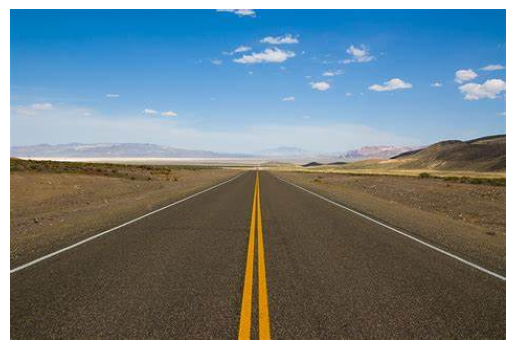

In [5]:
image_path = r'day1_images\1.jpeg'  #Make sure to put an r if you have error
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()



## Detecting Edges with the Canny Filter
Now that we can load and display images, let’s explore one of the most fundamental techniques in computer vision: edge detection. The Canny filter helps us identify the boundaries and shapes within an image—a crucial step for object detection, lane finding, and more.

### Why Edges Matter
Edges define the structure of objects in an image. By detecting them, we can:

 * Simplify image analysis by focusing on key features

 * Prepare data for advanced tasks (e.g., contour detection, object recognition)

 * Reduce noise while preserving important visual patterns

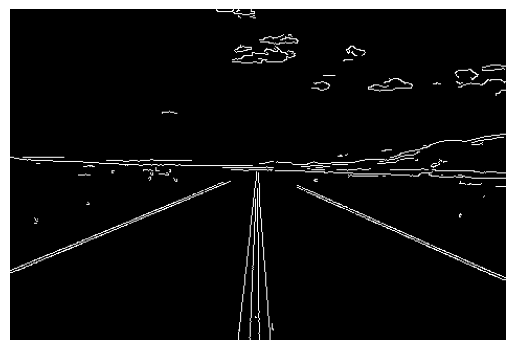

In [6]:
image_path = r'day1_images\1.jpeg'  
image = cv2.imread(image_path)
image_gray = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(image_gray, 180, 300)  # Apply the canny filter  with threshold lower  180 to 300 on upper 

plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

## Detecting Lines with HoughLinesP
Now that we've extracted edges using the Canny filter, let's take the next step: identifying straight lines in our image. The Probabilistic Hough Line Transform (HoughLinesP) converts edge points into meaningful line segments—perfect for detecting lanes, building edges, or any linear structure.

### From Edges to Lines: Why It Matters
While edge detection shows us where boundaries exist, HoughLinesP helps us:

* Understand geometric relationships between edges

* Measure object dimensions (e.g., road markings, architectural features)

* Filter noise by focusing only on coherent lines

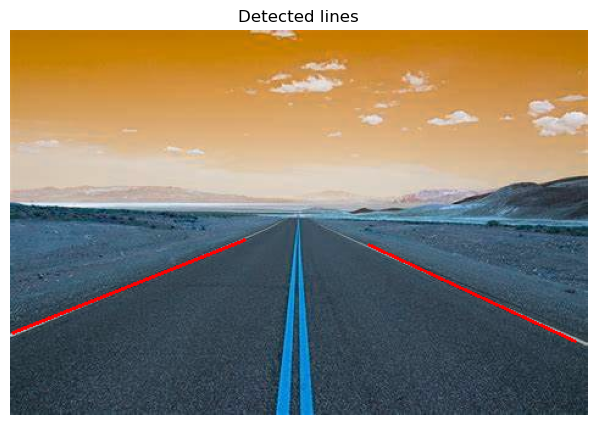

In [7]:

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 180, 300) #It is binary 
"""t_lower : If a pixel’s gradient is below this value, it’s rejected outright. 

  t_upper : Pixels with gradients above this value are definitely considered edges.  """


#Detect the lines by using HoughLines 
lines = cv2.HoughLinesP(edges, 1, # 1 the resolution of 1 pxl,
                        np.pi / 50,# angle resolution of pi/180, 
                          threshold=100, # minimum acumulator of 100, 
                          minLineLength=50,# min lenght to be accepted as a line 
                            maxLineGap=30)#maximum gap between line to treat them as a single line

#Draw the lines detected
output = image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(output, (x1, y1), (x2, y2), (255, 0, 0), 2) #Print the lines 

# Show the result 
plt.figure(figsize=(10, 5))
plt.imshow(output,cmap='gray')
plt.axis('off')
plt.title('Detected lines')
plt.show()


## Say Cheese! Activating Live Camera Capture
Let's bring our vision system to life! In this section, we'll transition from static images to real-time video processing—the foundation for interactive applications like facial recognition or augmented reality.

### Why Live Camera Matters
Unlike single images, video streams allow us to:

* Build responsive systems (e.g., gesture controls)

* Process temporal patterns (motion detection)

* Create immersive AR/VR experiences

In [8]:
cap = cv2.VideoCapture(0) # Capture the photograms, 0 is the number of the camera 

while True :
    ret, frame = cap.read() # Read the frame and size 
    if not ret: # If there is nothing the code finish 
        break
    
    # cv2.imshow create a window
    cv2.imshow("Cheese", frame)  # Name of the window is "cheese", and will be adding frame to that window 

    if cv2.waitKey(1) & 0xFF == ord('q'): #If you want to finish press q (you can change the keyboard you want)
        break

    #The whole loop get updated per photogram 

cap.release() # Finish to capturing 
cv2.destroyAllWindows() # Close the window 


## Real-Time Edge & Line Detection
Let's combine what we've learned! We'll now apply Canny edge detection and Hough line transforms to a live camera feed - the foundation for applications like:

* Autonomous vehicle lane detection

* Industrial quality control systems

* Interactive art installations

### How It Works (Live Version)
While the core algorithms remain the same, real-time processing adds new considerations:

Frame Processing Pipeline:

Camera captures frame → Convert to grayscale → Apply Canny → Detect lines with Hough


In [9]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Processing the image 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # Change the color to gray 

    
    edges = cv2.Canny(gray, 50, 150)  # Apply the canny filter  with threshold lower  50 to 150 on upper 
    """t_lower : If a pixel’s gradient is below this value, it’s rejected outright. 

        t_upper : Pixels with gradients above this value are definitely considered edges.  """

    #Detect the lines by using HoughLines 
    lines = cv2.HoughLinesP(edges, 1, # 1 the resolution of 1 pxl,
                            np.pi / 50,# angle resolution of pi/180, 
                            threshold=100, # minimum acumulator of 100, 
                            minLineLength=50,# min lenght to be accepted as a line 
                                maxLineGap=30)#maximum gap between line to treat them as a single line

    #Draw the lines detected
    output = frame.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(output, (x1, y1), (x2, y2), (255, 0, 0), 2) #Print the lines 

    # Mostrar resultado
    cv2.imshow("Canny", output)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break



## 🚀 Challenge: Build Your Own Circle Detector!

It's time to put your skills to the test! Below is a framework to create a customized circle detection system. 

<details>
<summary><b>🎯 Basic Challenge</b> (Click to expand)</summary>

### Minimum Requirements:
1. Live camera circle detection
2. Adjustable radius range (min/max)
3. Visual feedback:
   - Green outline for detected circles
   - Red dot at circle centers
4. Exit with 'q' key

```python
# Your starter template

gray = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(
    gray, 
    cv2.HOUGH_GRADIENT, 
    dp=1.2, 
    minDist=20,
    param1=50, 
    param2=30, 
    minRadius=10, 
    maxRadius=100
)


if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(output, (i[0], i[1]), 2, (0, 0, 255), 3)

cap = cv2.VideoCapture(0)


In [10]:
# Star here :  



<details><summary>Click here to view the solution.</summary>
```
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Processing the image 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # Change the color to gray 
    gray = cv2.medianBlur(gray, 5)

    circles = cv2.HoughCircles(
    gray, 
    cv2.HOUGH_GRADIENT, 
    dp=1.2, 
    minDist=80,
    param1=50, 
    param2=50, 
    minRadius=50, 
    maxRadius=150
    )

    output = gray.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(output, (i[0], i[1]), 2, (0, 0, 255), 3)

    # Mostrar resultado
    cv2.imshow("Canny", output)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

```
</details>

<h2>Artificial Neural Networks</h2>

<img src="http://cocl.us/neural_network_example" alt="Neural Network Example" width="600px">

## 1. Setting Up Your Environment
First, let's make sure you have the required libraries installed:

```python
!pip install numpy 

In [11]:
import numpy as np  

## Weights and biases

To start with to random weights and biases to create our first Neural Network 

In [3]:


weights = np.around(np.random.uniform(size=6), decimals=2) # initialize the weights
biases = np.around(np.random.uniform(size=3), decimals=2) # initialize the biases

print(weights)
print(biases)

[0.15 0.88 0.69 0.24 0.92 0.37]
[0.52 0.81 0.93]


Now will add our first inputs 

In [4]:
x_1 = 0.5 # input 1
x_2 = 0.85 # input 2

print('x1 is {} and x2 is {}'.format(x_1, x_2))

x1 is 0.5 and x2 is 0.85


### The nodes 
The nodes works with the fuctionality of the weights and biases
To separate into 1 to 0 

Z = mx + b 

In [5]:
z_11 = x_1 * weights[0] + x_2 * weights[1] + biases[0]

print('The weighted sum of the inputs at the first node in the hidden layer is {}'.format(z_11))

z_12 = x_1 * weights[2] + x_2 *weights[3] + biases[1]
print('The weighted sum of the inputs at the second node in the hidden layer is {}'.format(np.around(z_12, decimals=4)))

The weighted sum of the inputs at the first node in the hidden layer is 1.343
The weighted sum of the inputs at the second node in the hidden layer is 1.359


### Activaction functions 

The one that decides base of the results of the nodes by a function in the case will be : 1/1+exp(n)

In [6]:
a_11 = 1.0 / (1.0 + np.exp(-z_11))

print('The activation of the first node in the hidden layer is {}'.format(np.around(a_11, decimals=4)))

a_12 = 1.0 / (1.0 + np.exp(-z_12))
print('The activation of the second node in the hidden layer is {}'.format(np.around(a_12, decimals=4)))

The activation of the first node in the hidden layer is 0.793
The activation of the second node in the hidden layer is 0.7956


In [7]:
z_2 = a_11 * weights[4] + a_12 * weights[5] + biases[2]
print('The weighted sum of the inputs at the node in the output layer is {}'.format(np.around(z_2, decimals=4)))
a_2 = 1/(1+np.exp(-z_2))
print('The output of the network for x1 = 0.5 and x2 = 0.85 is {}'.format(np.around(a_2, decimals=4)))

The weighted sum of the inputs at the node in the output layer is 1.9539
The output of the network for x1 = 0.5 and x2 = 0.85 is 0.8759


Now, the application by one by one node is complicate and not efficient it will use several nodes and layers as the follow image : 

<img src="http://cocl.us/general_neural_network" alt="Neural Network General" width="600px">


# Computer Vision Workshop - Required Libraries

In this  part of workshop we will use the following Python libraries:
- numpy: for numerical operations and array handling
- tensorflow: for machine learning tasks (CPU and/or GPU acceleration)
- matplotlib: for plotting and visualizations

---

## Installation

### Using pip

If you want TensorFlow **CPU only**:
pip install numpy matplotlib tensorflow==2.15.0


### Importing the libraries in your code

<details>
<summary><b>🎯 Usando el potencial</b> (Click to expand)</summary>

- torch (PyTorch) → for alternative deep learning frameworks (also supports GPU)

❌ If you get *"nvcc is not recognized as an internal or external command"*, CUDA is not installed.

---

## How to install CUDA and cuDNN

👉 Download the official **CUDA Toolkit 11.8** (recommended for TensorFlow 2.15 / PyTorch 2.x):
https://developer.nvidia.com/cuda-11-8-0-download-archive

👉 Download **cuDNN 8.x for CUDA 11.x** (requires free NVIDIA developer account):
https://developer.nvidia.com/rdp/cudnn-archive#a-collapse811-archive

📌 *During installation*:
- Add CUDA's `bin` folder to your system PATH.
- Verify with: `nvcc --version`



### If using TensorFlow **with GPU**
pip install numpy matplotlib tensorflow[and-cuda]==2.15.0 torch==2.2.0+cu118 torchvision==0.17.0+cu118 torchaudio==2.2.0+cu118 -f https://download.pytorch.org/whl/torch_stable.html

⚠️ *Make sure your CUDA/cuDNN versions match TensorFlow and PyTorch requirements (CUDA 11.8 recommended).*



⚠️ **Note:** 
- Requires the cuda beforehand 
- The GPU version requires a compatible NVIDIA GPU with CUDA > 11.8 and cuDNN installed.
- Make sure you have the appropriate drivers before installing `tensorflow[and-cuda]`.
- If using a virtual environment (recommended), activate it first!

---


### Verify GPU is detected

In Python:
```python
import tensorflow as tf
import torch

print("TensorFlow GPU devices:", tf.config.list_physical_devices('GPU'))
print("PyTorch CUDA available:", torch.cuda.is_available())
print("PyTorch device count:", torch.cuda.device_count())

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Creating Our First Neural Network Model

In this section, we will build a simple neural network using Keras. 
We will define input features X and target labels y.

We will add one input layer and one output layer to the model. 
The input layer will receive X data, and the output layer will predict y labels.

We will use the Keras Sequential API to create the model.


In [9]:
X = np.array([-20, -5, 1, 5, 20, 55, 76],  dtype=float)
y = np.array([-10, 35, 53, 65, 110, 215, 278],  dtype=float)
 
 
layer_1 = tf.keras.layers.Dense(units=1, input_shape=[1])
 
model = tf.keras.Sequential([layer_1])

## Compile the model and start the training

We will compile the model using a learning rate of 0.1. 
A smaller learning rate could improve precision but would slow down training 
and might increase the risk of overfitting.

We will use mean square error as the loss function, 
since it measures the difference between predicted and actual values. 
For optimization, we will use Adam, a popular choice for training neural networks.

Finally, we will start the training process using `model.fit`, 
providing the input data, output labels, and the desired number of epochs.


In [ ]:
learning_rate = 0.1 #Tried 0.001, 0.01 and 0.1
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(learning_rate))
 
history = model.fit(X, y, epochs=10, verbose=True)

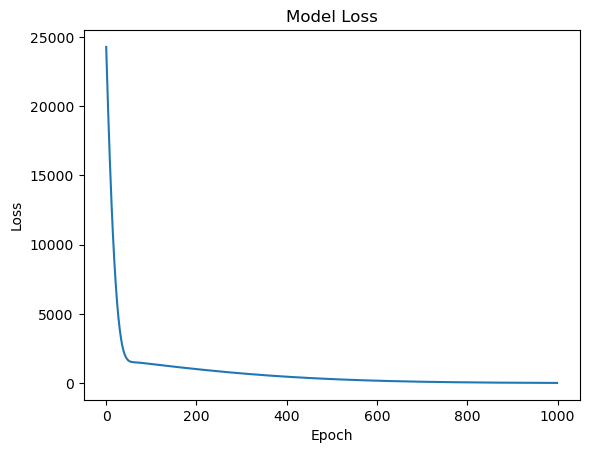

In [11]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

### Now to predict !

In [12]:
# Convert the input to a NumPy array
prediction_input = np.array([100.0])
 
# Now pass the NumPy array to predict
print(model.predict(prediction_input))

1/1 [==============================] - 0s 137ms/step
[[351.6065]]


## 🚀 Challenge: Build Your Own ANN!

It's time to put your skills to the test! Below is a framework to predict if exited with the data given below. 

<details>
<summary><b>🎯 Basic Challenge</b> (Click to expand)</summary>

### Minimum Requirements:
1. Live camera circle detection
2. Adjustable radius range (min/max)
3. Visual feedback:
   - Green outline for detected circles
   - Red dot at circle centers
4. Exit with 'q' key

In [21]:
# Read the cvs files 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#Create the model using keras 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

# Load the CSV file
df = pd.read_csv('day1_images\SampleChurnModel.csv')
# Display the first few rows of the DataFrame
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [22]:
X = df[['Age', 'EstimatedSalary','CreditScore','IsActiveMember', 'HasCrCard','NumOfProducts','Balance','Tenure']].values
Y = df['Exited'].values

In [23]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
# Fit the scaler on the training data
X_train = scaler.fit_transform(X_train)
# Transform the test data using the fitted scaler
X_test = scaler.transform(X_test)   



In [24]:

# Define the model architecture
model = models.Sequential()


In [27]:

# Add layers to the model
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [28]:
# Train the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
200/200 [==============================] - 2s 4ms/step - loss: 0.5395 - accuracy: 0.7900 - val_loss: 0.4858 - val_accuracy: 0.7987
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4615 - accuracy: 0.7934 - val_loss: 0.4402 - val_accuracy: 0.7987
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4463 - accuracy: 0.8075 - val_loss: 0.4368 - val_accuracy: 0.8238
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4393 - accuracy: 0.8253 - val_loss: 0.4266 - val_accuracy: 0.8344
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4336 - accuracy: 0.8266 - val_loss: 0.4238 - val_accuracy: 0.8338
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4277 - accuracy: 0.8303 - val_loss: 0.4238 - val_accuracy: 0.8256
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4269 - accuracy: 0.8325 - val_loss: 0.4202 - val_accuracy: 0.8338
Epoch 

In [29]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


63/63 [==============================] - 0s 2ms/step - loss: 0.3707 - accuracy: 0.8470
Test Loss: 0.37070345878601074, Test Accuracy: 0.847000002861023


In [ ]:
# Make predictions
predictions = model.predict(X_test)
# Convert predictions to binary values (0 or 1)
predicted_classes = (predictions > 0.5).astype(int)
# Display the first few predictions
print("Predicted classes:", predicted_classes.flatten()[:10])
# Save the model
model.save('churn_model.h5')